<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/Tensorflow/ML_ch11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch 11. CNN

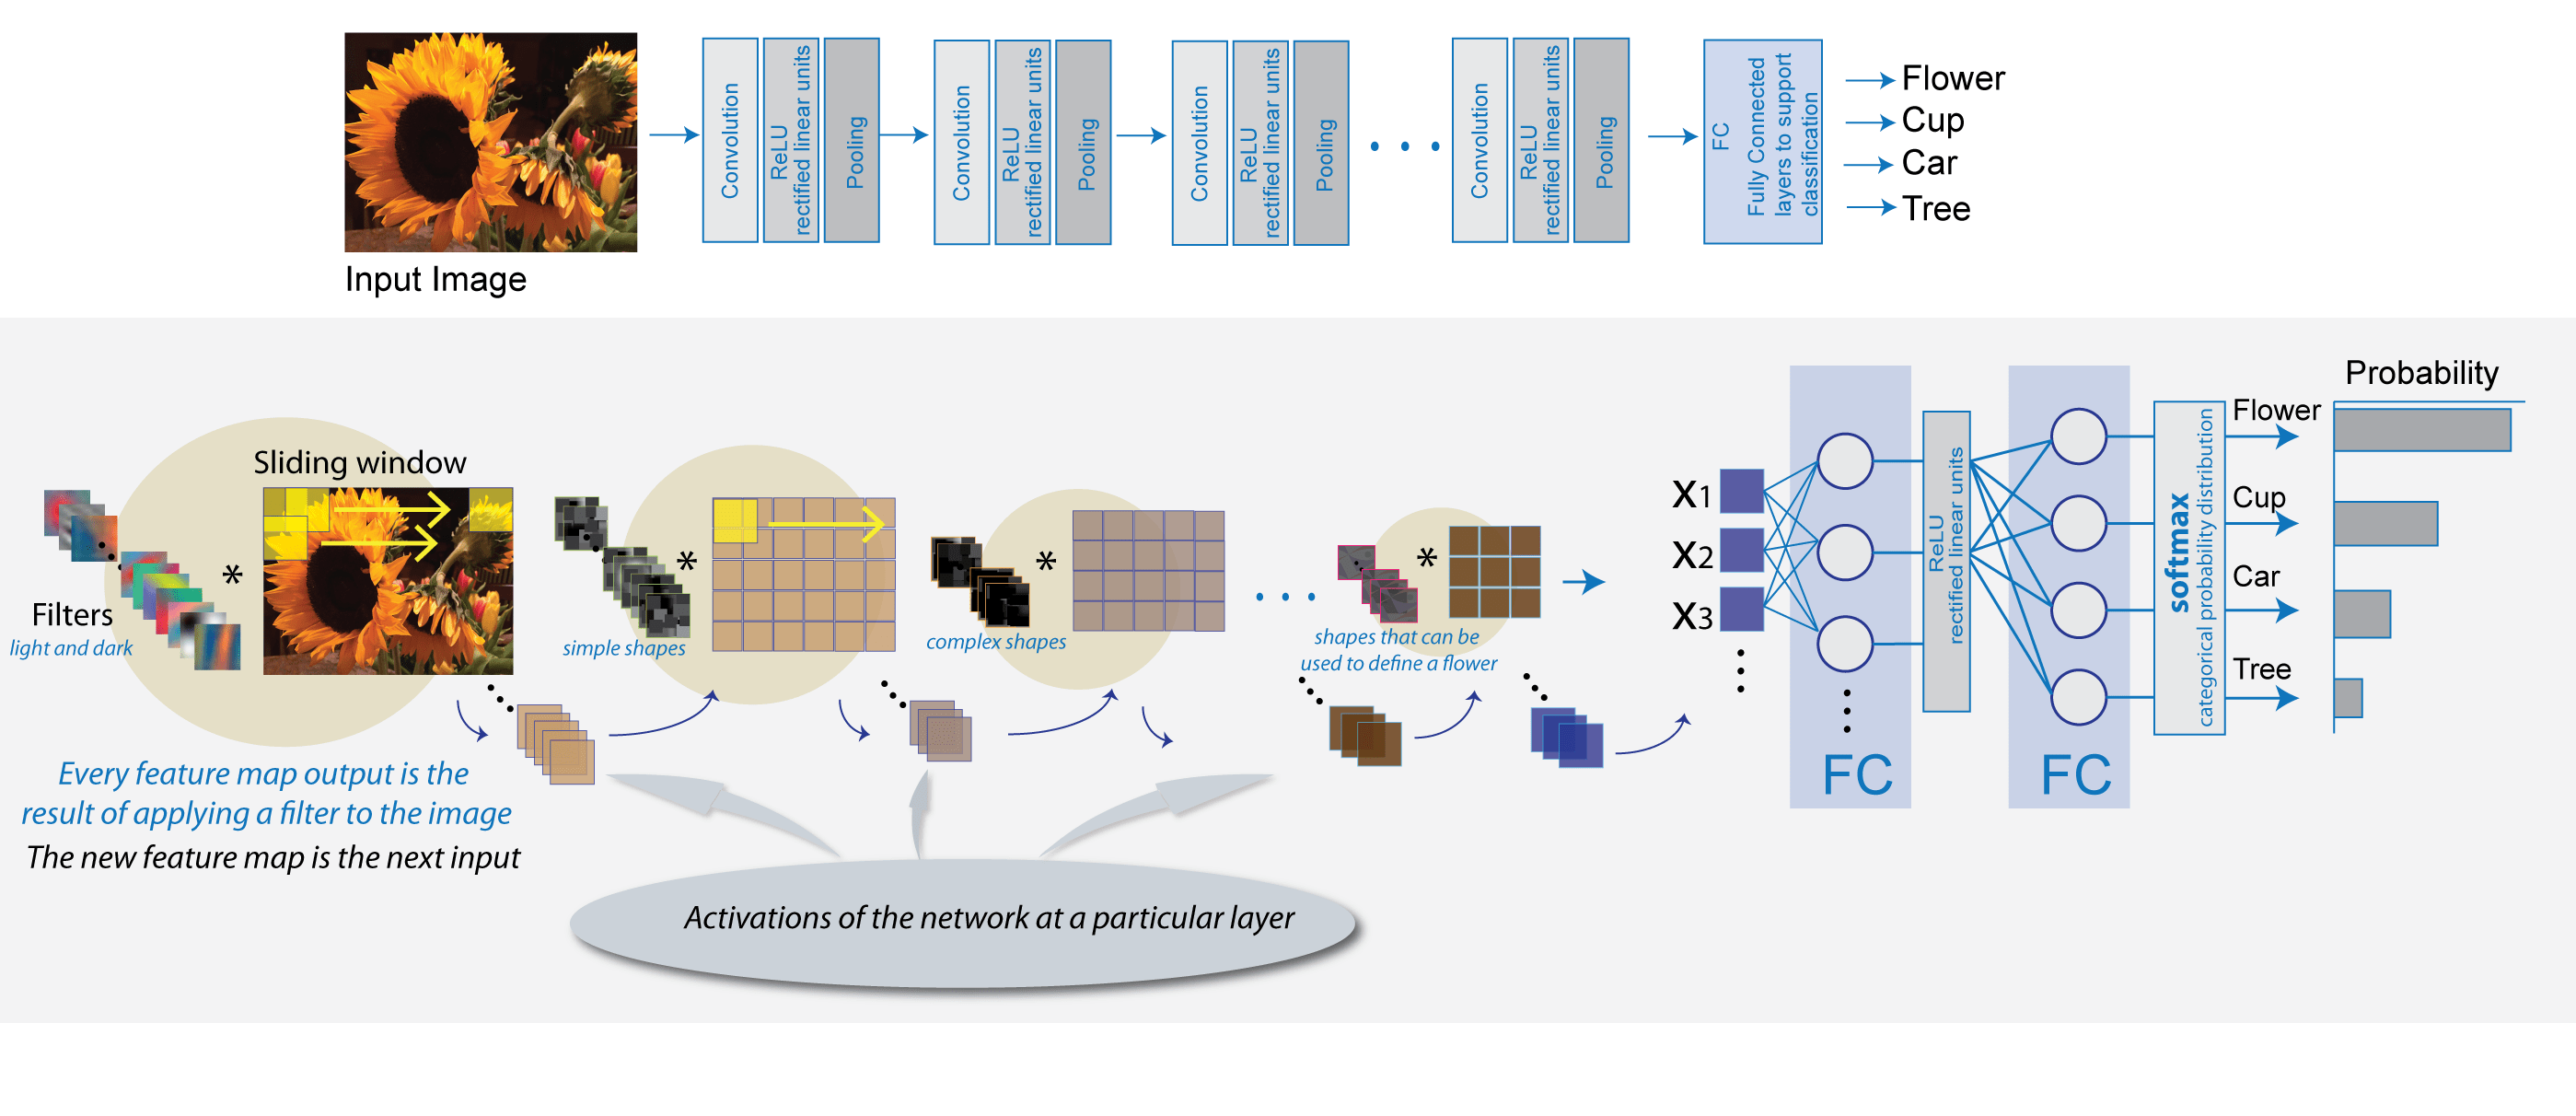

CNN은 과정은 이렇다. \
> input > (conv. > relu > conv > relu > pool)*n > FC(Fully Connected)
역시 아직은 잘 와닿지 않는다. 자세히 알아보도록 하자.

## Convolute (감아 넣다, 둘둘 말다)

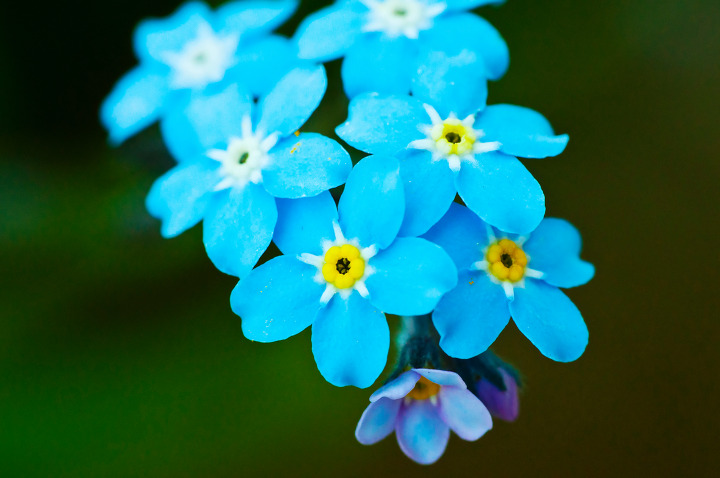

하늘색이 참 예쁜 꽃 사진이다. 이것을 이용해 CNN을 형성해보려 한다. 이 사진을 잘게 잘라보자.

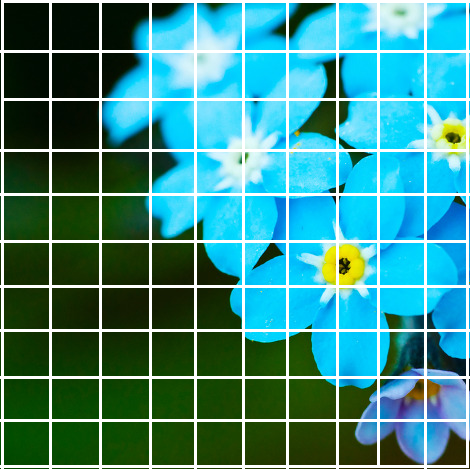

크기 10x10 px로 나타냈다. (실제로는 720x478px.) 추가로, 1x1 px마다 그 안에 색을 나타내는 3가지의 정보가 들어가 있다. 즉, 10x10x3 의 input size를 가진다.

지금부터 이 사진의 일부를 돋보기로 흝듯이 볼 것이다. 그 돋보기는 Filter라고 하며 주황색으로 표시했다.


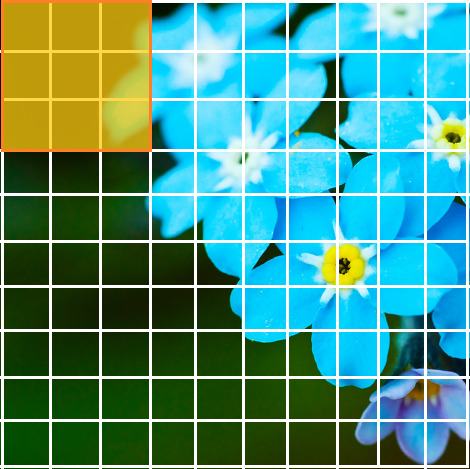

Filter도 역시 (가로)x(세로)x(색)의 size를 가진다. 이 예시에서는 3x3x3 이다.
Filter를 통해 들여다보면 output으로 weight $w$가 하나 출력한다.

그리고 Filter는 n칸씩 상하좌우로 이동하며 weight 하나씩을 출력한다. 
그러면 weight들의 모임은 (가로)x(세로)x1 의 size를 가지게 된다.
이 때 n을 stride라고 한다.

이 예시에선 3x3x3 의 filter를 우로 1칸(strider)씩 움직여 우측 끝까지, 밑으로 1칸(strider)씩 움직여 하단 끝까지 이동한다. 그러면 주황색 filter로 인해 8x8x1 개의 weight이 출력된다.

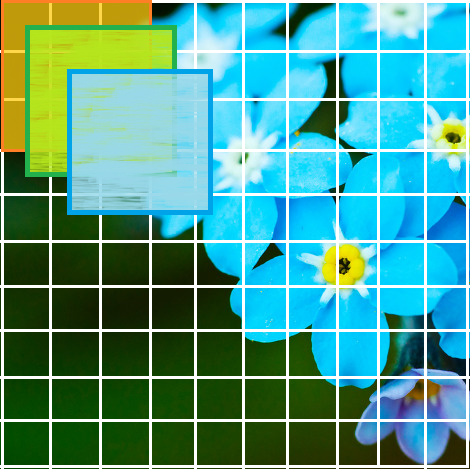

Filter는 주황색뿐만 아니라 녹색, 파란색도 있다. 이렇게 제각기 다른 filter로 출력한 weight은 8x8 개, 주 녹 파 filter를 썼으므로 3 개층을 형성한다. 이 weight 모임을 바로 convolutional layer라고 하고, 그 size는 8x8x3 이다.

어, 그런데  아까 stride가 1이 아니라면 weight의 size가 소수가 생길 수도 있다.

만약 stride=2라면,
> (가로 4.5 개) x (세로 4.5 개) x (output_$w$ 1) :< Bad
  
만약 stride=3이라면,
> (가로 3.33..개) x (세로 3.33..개) x (output_$w$1) >:( Bad

우리가 사람을 하나 둘 셋, 이렇게 정수로 세지 145.45 명 이런식으로 세지는 않는다. 그렇듯 weight의 갯수도 정수형이다. 소수가 나오면 께름칙하다. 그러니 padding을 알아보아서 이 문제를 해결해 보자.

## Padding (덧대기)

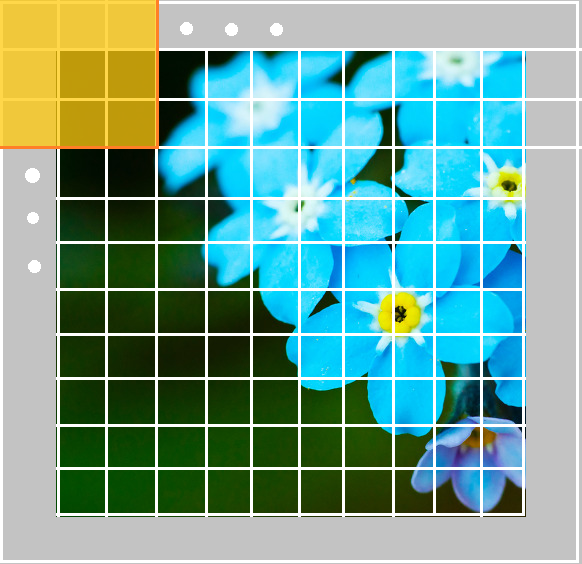

pad, 즉 '덧댄다, 깔아둔다'라는 의미다. Input image의 가장자리에 색정보가 0인 회색픽셀을 몇 px 깔아둔다. 그러면...

If stride=1,
> 10 x 10 output :)

If stride=2,
> 5.5 x 5.5 output :(

If stride=3,
> 4 x 4 output :)

아까와 달리 stride=3 일 때 정수형으로 size가 나온다!

이렇게 zero pad를 덧대면 이러한 특징이 있다.
* 그림이 layer를 거치면서 작아지는 현상을 없앨 수 있다. (if stride=1)
* stride에 따라 유연한 대처가 가능하다.
* For a direction, $output = (N-F) / strider + 1$
 > $; N=$ (pad까지 합친 px)$, F=$ (Filter px)
* Filter size에 따라 pad를 양껏 조절한다.
 > for F=3, zero pad with 1 \
 for F=5, zero pad with 2 \
 for F=7, zero pad with 3 \
 $\vdots$


## ReLU with convoluting

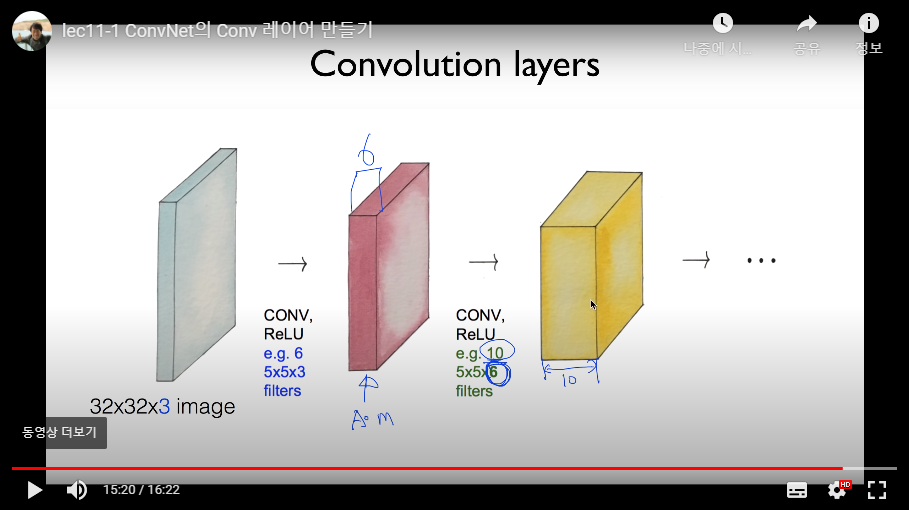

이 교수님의 강의에서도 위에서 했던 원리가 그대로 적용된다.

이 슬라이드에서는 input이 32 x 32 x 3 이다. 그것을 conv. 및 ReLU를 제각기 따로 6개의 filter를 적용하여 28 x 28 x 6 의 첫번쨰 conv. layer를 형성한다.

첫번째 conv. layer를 한번 더 똑같이 conv. 및 ReLU를 적용한다. 이번에는 filter 10개로 들여다보아 19 x 19 x 10 의 두번째 conv. layer가 된다. 이렇게 몇 번을 거듭하면 층수가 두꺼워진다.

전체적인 개괄도는 아래와 같다.

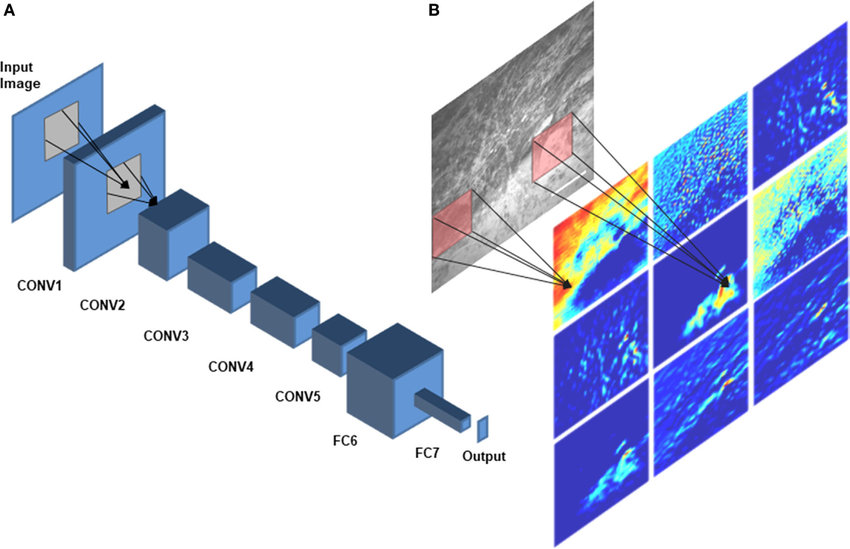

이렇게 몇번의 conv. 및 ReLU를 거치고나서 Fully Connected (평소에 쓰던 NN)을 통해 최종 output을 얻는다. 아! 그런데 아직 안끝났다! conv. 및 ReLU를 몇 번씩 거치면 지나치게 두꺼워져서 overfitting된다. *(아래 링크를 참조)*

Pooling 이라는 것을 해서 feature를 추려내어 줘야한다.

REF)
https://hobinjeong.medium.com/cnn%EC%97%90%EC%84%9C-pooling%EC%9D%B4%EB%9E%80-c4e01aa83c83

## Pooling (풀장만들기)

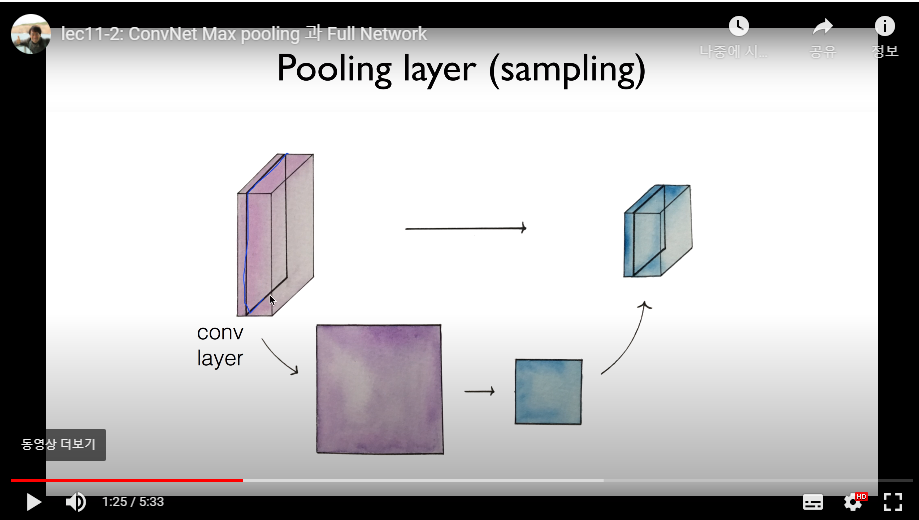

원리는 conv. layer에서 filter로 훑어내는 것과 비슷하다. 다만 filter와 역할이 전혀 다르다. 나는 이것을 sample이라고 부를 것이다. 이 sample 구역 내에서 최고값 또는 최저값, 평균값을 구역의 대표로 하나만 내보낸다.

위의 그림에서는 보라색 네모(conv. layer)가 파란색 네모(sampled layer)로 변하면서 크기가 작아졌다. 좀 더 수학적으로 자세히 보자.

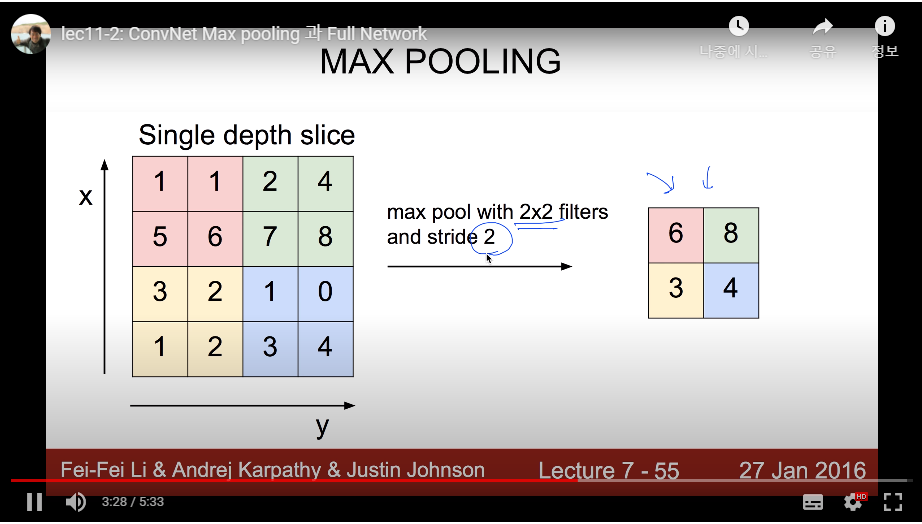

여기서는 max-pooling을 해본다.

> 빨간 sample 에서 최대값 6 \
녹색 sample 에서 최대값 8 \
노랑 sample에서 최대값 3 \
파랑 sample에서 최대값 4

Size가 4 x 4 인 것이 2 x 2 로 줄었다. 이렇게 추려내는 것이 pooling이다. 이렇게 pooling까지 끝나면 드디어 FC를 통해 모델링이 구축된다.


## Fully Connected

두꺼워진 convolutional layer는 3 dimension을 갖는다. 이것을 일렬로 펼쳐줘야한다. 그즉슨, 1 x n size로 한 차원 낮춰야한다. 이 과정은 두 단계로 나뉘어진다.

1. Weight $w$ must be flatten, then use ReLU.
2. Flatten once a more. Use initializer=xavier(glorot_uniform)

keras에서는 간단하게 flatten을 이용하면 되고, \
tf v1.0에서는 마지막 conv. layer의 L(가짜 hypo.)를 reshape하면 된다.
```
L_n = tf.reshape(L_n-1, 가로 * 세로 * layer갯수)
```

이로써 CNN을 이용해 최강의 acc.를 얻을 수 있다 ㅎㅎ



## Demo(visualizaion)

https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

# Practice

## Practice: simple convolution layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


(1, 3, 3, 1)


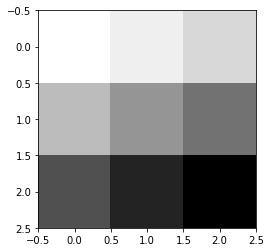

In [ ]:
sess = tf.InteractiveSession()
image = np.array([
                  [
                   [[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]
                   ]
                  ], dtype=np.float32)
print(image.shape)

# image를 시각화 (0: white ~ 1: black)
plt.imshow(image.reshape(3,3), cmap='Greys')

|1|2|3|
|-|-|-|
|4|5|6|
|7|8|9|

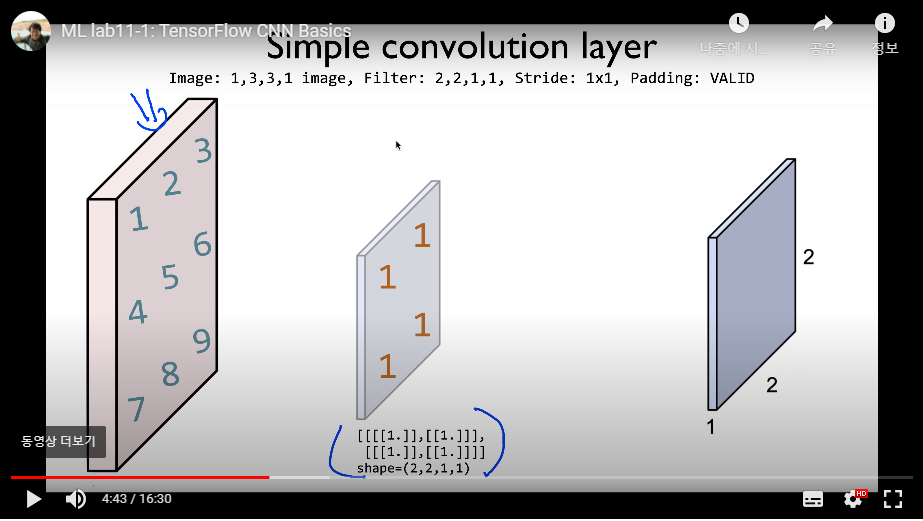

* Index means...
 > Image: image의 rank주목.  \
 > Filter: 가로, 세로, 색, 필터 수 \
 > Stride: 1x1

* Conv. layer results...
 > 1+2+4+5=12 \
2+3+5+6=16 \
4+5+7+8=24 \
5+6+8+9=28

image.shape는 (레이어):(세로):(가로):(label) =  (1, 3, 3, 1)
weight.shape는 (세로):(가로):(label):(filter 수) =  (2, 2, 1, 1)
conv2d_img.shape는 =  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


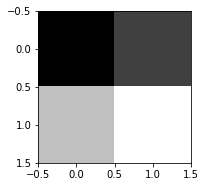

In [ ]:
print("image.shape는 (레이어):(세로):(가로):(label) = ", image.shape)

# define weight
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print("weight.shape는 (세로):(가로):(label):(filter 수) = ", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape는 = ", conv2d_img.shape)

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

# conv.의 값만 주목할 것... shape는 아직은 몰라도 됨.

conv2d_img.shape는 =  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


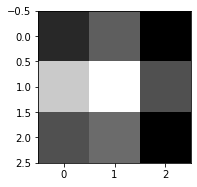

In [ ]:
# if padding: same (input.shape=output.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape는 = ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape는 (레이어):(세로):(가로):(label) =  (1, 3, 3, 1)
weight.shape는 (세로):(가로):(label):(filter 수) =  (2, 2, 1, 3)
conv2d_img.shape는 =  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


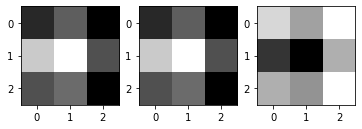

In [ ]:
# if using 3 filters
print("image.shape는 (레이어):(세로):(가로):(label) = ", image.shape)

# define weight
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                     [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape는 (세로):(가로):(label):(filter 수) = ", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape는 = ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

# conv.의 값만 주목할 것... shape는 아직은 몰라도 됨.

In [ ]:
# max pooling
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
                      strides=[1,1,1,1], padding='SAME')
print(pool.shape)
print(pool.eval())

# max_pooling 결과

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## Practice: MNIST visualization

11493376/11490434 [==============================] - 0s 0us/step


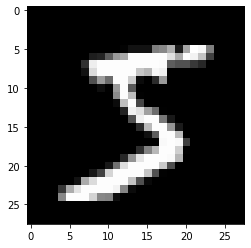

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap='gray')

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
### x_train을 전부 reshape해서 쓸 때 이 코드 사용.
# sess = tf.InteractiveSession()

# x_train = np.array(x_train, dtype=np.float32)
# x_train = x_train.reshape(-1, 28, 28, 1)
# W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# conv2d = tf.nn.conv2d(x_train, W1, strides=[1, 2, 2, 1], padding='SAME')
# print(conv2d)
# # print(type(x_train))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


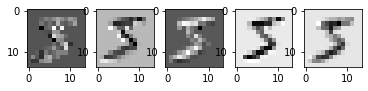

In [ ]:
sess = tf.InteractiveSession()

img = np.array(x_train[0], dtype=np.float32)
img = img.reshape(-1, 28, 28, 1)      # -1 means 'auto'
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))     # 세로, 가로, 색, 필터수
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')    # stride 2x2 -> 절반인 14x14로 줄음
print(conv2d)
sess.run(tf.global_variables_initializer())

# 그림 출력 (5개의 conv. image)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


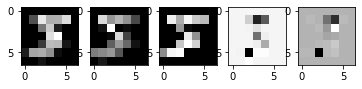

In [ ]:
# max pooling
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())

# 그림 출력 (5개의 sub-sampling image)
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
  plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

## Practice: MNIST CNN (go to file 'ML_ch11_prac4_keras')

# Use 'class' of python

모델을 사용할 때 이제 일일이 복붙, 반복노가다를 하지말자! 나는 이제부터 프로(가 된 것)처럼 일처리해야한다. 주요하게는 __init__, _build_net, predict, get_accuracy, train 등을 미리 만들어 두어 한 층 더 편ㅡ안해져 보자.

```
class Model:
  def __init__(self, sess, name):
  ''' 이 class(instance)를 호출하면 바로 작동합니다. '''
    self.sess = sess
    self.name = name
    self._build_net()

  def _build_net(self.name):
    with tf.variable_scope(self.name):
      # input placeholders
      self.X = tf.placeholder(tf.float32, [None, 784])
      # img 28x28x1 (BW)
      X_img = tf.reshape(self.X, [-1, 28, 28, 1])
      self.Y = tf.placeholder(tf.float32, [None, 10])

      # L1 ImgIn shape=(?, 28, 28, 1)
      W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
      L1 = tf.nn.conv2d(X_img, W1, strides=[1, 2, 2, 1], padding='SAME')
      ...

  def predict(self, x_test, keep_prop=1.0):
    return self.sess.run(self.logits, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prop: keep_prop})
  
  def get_accuracy(self, x_teet, y_test, keep_prop=1.0):
    return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prop=keep_prop})
```

앞으로 호출할 때는.......
```
# Initiate
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variable_initializer())

# Training
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    c, _ = m1.train(batch_xs, batch_ys)
    avg_cost += c / total_batch
```

이렇게 쓰면 된다. 근데 위의 코드는 TF 1.0 기준으로 작성된 것이지 나중에 내가 직접 keras로 코드를 짜보자.

참고로 TF 1.0처럼 노가다한 것은 low-lv API라고 하고, \
TF 2.0의 keras를 이용해 간단하게 쓴 것은 hi-lv API라고 한다. TF 1.0에도 keras의 기능이 있긴하다. 호출법이 다를 뿐.

# Ensemble

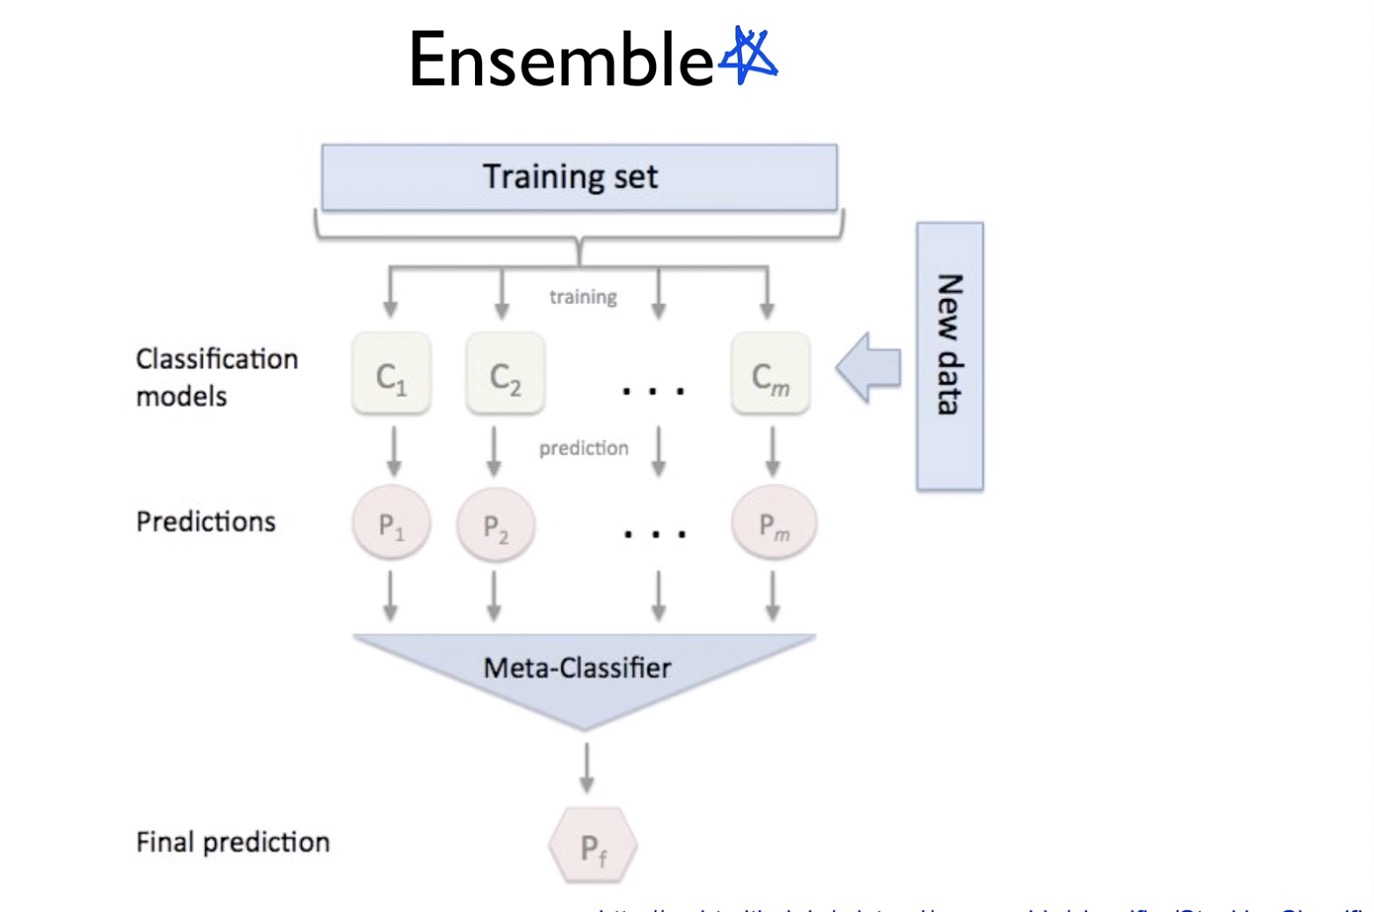

이제는 class 및 instance를 통해 model를 여러개를 준비할 수 있다. 하나만 작동시키는게 아니라, 여러개를 training을 한다. 그리고 테스트 acc.가 가장 좋은 것만 골라쓰는 식이다. Ensemble training은 다음과 같이 코딩한다.

```
models = []
num_models = 7

for m in range(num_models):
  models.appen(Model(sess, "model", str(m)))

sess.run(tf.global_variable_initializer())

# Training
for epoch in range(training_epochs):
  avg_cost_list = np.zeros(len(models))
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    ...

    # Train each models
    for m_idx, m in enumerate(models):
      c, _ = m.train(batch_xs, batch_ys)
      avg_cost_list[m_idx] += c / total_batch

  print('Epoch: ', '%05d'%(epoch + 1), 'Cost: ', avg_cost_list)

print('Learning fininshed.')
```

Prediction:
```
# Test model & check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
  print(m_idx, 'Accuracy: ', m.get_accuracy(mnist.test.images, mnist.test.labels))
  prediction += p

ensembel_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy: ', sess.run(ensemble_accuracy))
```

그러면 각 model들은 아래 그림과 같이 자기마다 예측값에 대한 의견을 낸다.

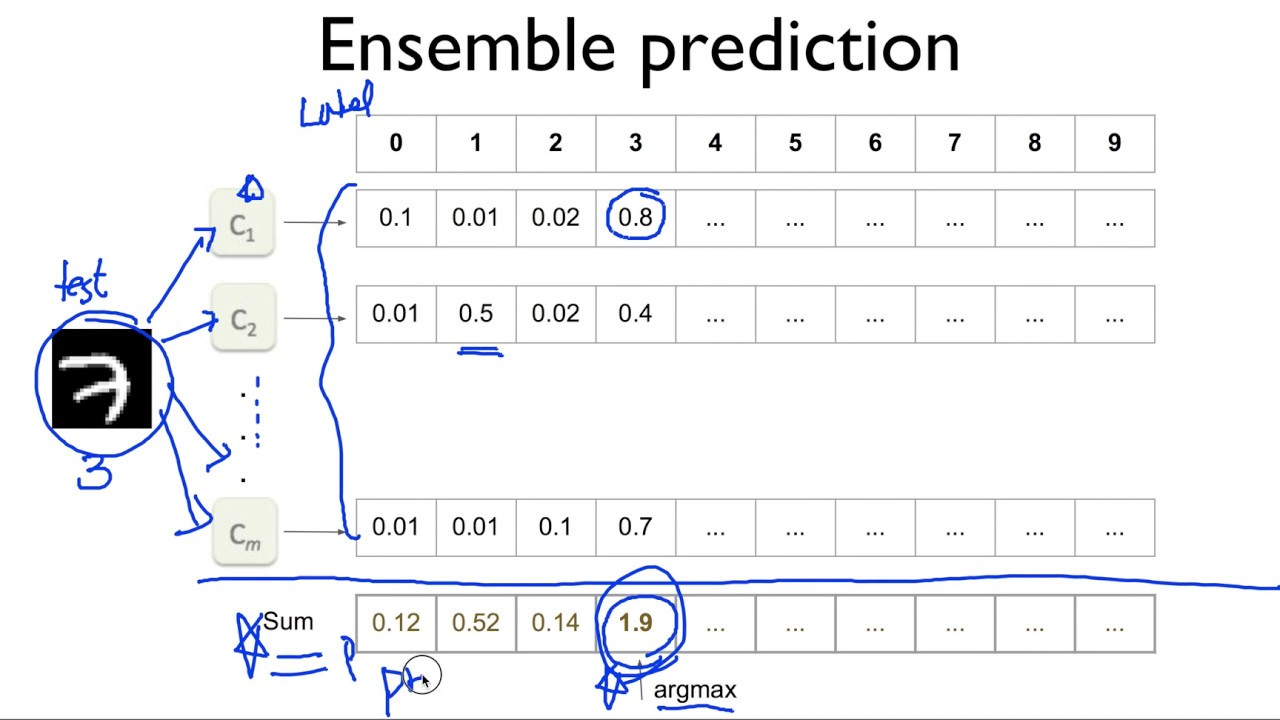

model c1은 **'3'**인 것 같다고 0.8점을 주었다. c2는 애매했는지 **'1'**같다고 0.5점을 주었다. 이 점수는 argmax이며, 모든 모델의 점수들을 digit별로 모아 합계한다. 그렇게 해서 가장 높은 점수를 가진 digit을 최종 예측이라고 합의한다. 나름 민주적이라 할 수 있겠다.

# Excercise
* Try deep & wide
* How about complex data?
 * CIFAR 10
 * ImageNet